In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import logistic 
import math
%matplotlib inline

# Определяем Логистическое распределение

Про логистическое распределение можно почитать [тут](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

Математическое ожидание:
$E[x] = \mu$, где $\mu$ - вещественное число. По-умолчанию в scipy.stats = 0

Дисперсия:
$D[x]= \frac{\pi^2}{3} s^2\!$, где s>0 - вещественное число. По-умолчанию в scipy.stats = 1

In [2]:
# Зададим параметры распределения 
m = 0.0
s = 1.0

# Рассчитаем Мат. ожидание и Дисперсию
E = m
D = (math.pi**2/3.0)*(s**2)
print("Мат. ожидание E(x)= "+str(E))
print("Дисперсия D(x)= "+str(D))

Мат. ожидание E(x)= 0.0
Дисперсия D(x)= 3.289868133696453


Проверю, правильно ли рассчитал параметры

In [3]:
mean,var = logistic.stats(m,s)
print('Мат. ожидание =', mean,'\nДисперсия =', var)

Мат. ожидание = 0.0 
Дисперсия = 3.289868133696453


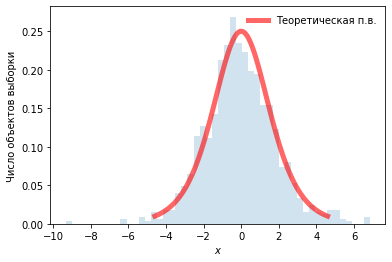

In [4]:
# нарисуем график плотности распределения
x = np.linspace(logistic.ppf(0.01),logistic.ppf(0.99), 100)
plt.plot(x, logistic.pdf(x,m,s),'r-', lw=5, alpha=0.6, label='Теоретическая п.в.')

# генерируем случайную выборку из 1000 значений
r = logistic.rvs(loc=m, scale=s,size=1000)
# строим гистограмму выборки и накладываем на график плотности распределения
plt.hist(r, bins=50,density=True, histtype='stepfilled', alpha=0.2)
plt.ylabel('Число объектов выборки')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)
plt.show()

# Оценим распределение выборочного среднего случайной величины при разных объёмах выборок

In [5]:

def drawFnc(n,m,var,x):
    samples=np.array([]) 
    i=1
    while i <= 1000: #цикл генерации случайных выборок количества n из функции
        sample = logistic.rvs(loc=m, scale=s,size=n) #генерация выборки
        mn=sum(sample)/n #определение выборочного среднего (в.с.)
        samples=np.append(samples,mn) #добавляем в массив новое значение в.с.
        i+=1
    D1=var/n #дисперсия для нормального распределения приближающего выборку средних
    sigma = math.sqrt(D1) #сигма для нормального распределения выборки средних
    
    #определяем нормальное распределение с расчетными характеристиками Логистического распределения
    norma  = sts.norm(loc = m, scale = sigma) 
    pdf   = norma.pdf(x) #получаем плотность распределения
    
    #строим гистограмму массива средних при n и плотность, описывающую этот массив нормального распределения
    plt.plot(x, pdf, label='PDF('+str(n)+')')
    plt.hist(samples,bins=80, density=True)
    plt.ylabel('Число объектов выборки')
    plt.xlabel('$x$')
    plt.legend(loc='best')
    plt.show()    


Для n=5


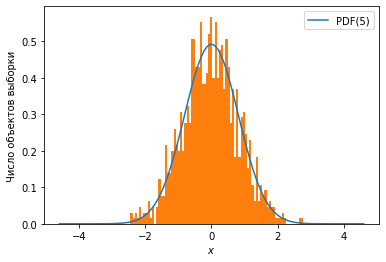

Для n=10


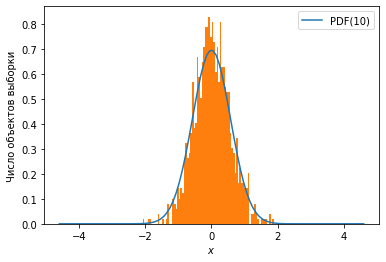

Для n=50


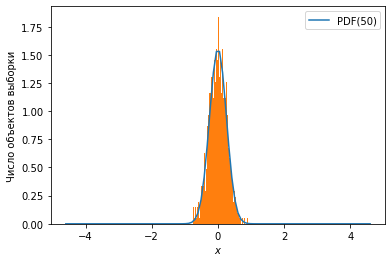

In [6]:
print("Для n=5")
drawFnc(5, mean, var, x);
print("Для n=10")
drawFnc(10, mean, var, x);
print("Для n=50")
drawFnc(50, mean, var, x);


Для выполнения задания была выбрана логистическая функция распределения. Были построены для трёх разных n (5, 10, 50) по 1000 случайных выборок, измерены их выборочные средние и составлены соостветствующие массивы, по массивам выборочных средних построены гистограммы распределения, исходя из теоретических данных определены соответствующие каждому n параметры распределений для апроксимации, по полученным параметрам построены функции нормального распределения для каждого n поверх соответствующих гистограмм.

По полученным графикам наблюдается увелечение точности апроксимации выборочного среднего значения непрерывной случайной величины описываемой логистическим распределением с увеличением числа выборок.